# Overview

This week we'll talk about some of the charachteristics of real-world social networks. The structure is the following: 

* Part 1: A crash course on real-world social networks.
* Part 2: Visualizing the network of Redditors
* Part 3: Properties of the real-world network of Redditors


> *Reading*: Read [Chapter 3 of the Network Science book.](http://networksciencebook.com/chapter/3). The most important sections are 3.1 to 3.4 and 3.8 to 3.10, so focus on that.

# Part 1 : Empirical properties of real-world social networks

Researchers in Computational Social Science have widely studied the properties of real-world social networks. The very cool thing they found is that many widely different social networks (from face-to-face interactions among classmates, to the Facebook network, to collaboration networks among scientists, etc) present some commonalities. We refer to those as 'Universalities'.
In the video-lecture below, I will introduce _some_ of the things we know to be true for most real-world social networks. 

>> **_Video Lecture_**. Start by watching the ["Properties of empirical social networks"](https://youtu.be/jHdnehLku54). 


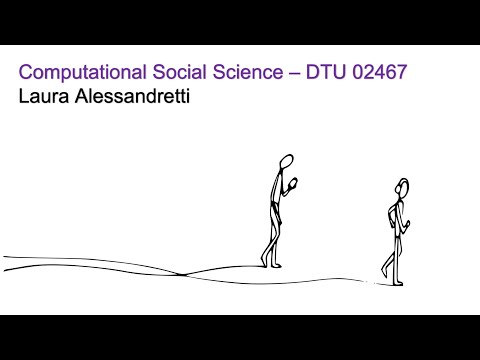

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("jHdnehLku54",width=800, height=450)

> *Exercise 1:* Did you really read the text? Answer the following questions (no calculations needed) in your Jupyter notebook.

> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
    >> * There is a lack of outliers, in a random network, there will not be any individuals with a very large num ber of friends and there will not be be any with just a few, as these have very low probability
> * List the four regimes that characterize random networks as a function of ⟨k⟩.
    >> * \<k\> = average degree of network, N = number o nodes in the network, $N_G$ = number of nodes in the largest cluster
    >> * The four regimes for random networks are (with \<k\> denoted k and $N_G/N = n$ for simplicity):
        >>> * Subcritical regime: 0 < k < 1, n = 0
        >>> * Critical point: k = 1
        >>> * Supercritical regime: k > 1
        >>> * Connected regime: k > ln N
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?
    >> * In a real network C(k) systematiccaly decreases with the degree, in a random network this should be independent of each other. 

# Part 2 : Visualizing the network of Redditors

Take the network of redditors you built in Week3, Part 3. To get an idea about how the network looks like, we start visualizing it. For this exercise, we will use the __awesome library [``netwulf``](https://netwulf.readthedocs.io/en/latest/index.html)__ created by Ulf Aslak, a colleague of mine and former DTU PhD student. You can install it via ``pip install netwulf``. 

Netwulf is built on top of [d3-force](https://github.com/d3/d3-force), a Javascript library that simulates the dynamics of particles moving in 2D. In the visualization, particles correspond to network nodes subject to forces:
 * Nodes are attracted to the center of the viz 
 * Nodes repel each other
 * Nodes linked by an edge will preferably stay at a fixed distance to each other.


> _Exercise_ 1: Visualize the network of Redditors. 
>
> * For this and the following exercise, we will study the undirected graph of "reciprocal" edges. Reciprocal edges are such that each of the two authors forming the edge has replied to the other at least once. Build the reciprocal graph using the function [``to_undirected``](https://networkx.org/documentation/stable//reference/classes/generated/networkx.DiGraph.to_undirected.html)(set ``reciprocal=True``). Assign to each undirected edge a weight equal to the sum of the weights in the two corresponding directed edges. Remove self-loops (edges connecting a node to itself). Remove from the network all the nodes without connections. 
> * How many nodes are present in the reciprocal graph? How many edges? Which fraction of the original network nodes and edges they represent? How do you interpret this result?
> * Visualize the undirected graph you just created using the function [``visualize``](https://netwulf.readthedocs.io/en/latest/reference/interactive.html?highlight=visualize#netwulf.interactive.visualize) of the Netwulf package. 
> * Play with the parameters of the netwulf algorithm to obtain a visualization you like. To understand better what the parameters mean, have a look at the [documentation](https://netwulf.readthedocs.io/en/latest/visualization/init.html?). Your visualization may look similar to the one below, where I made the size of nodes proportional to their strength (sum of weights on the outgoing edges), and I added the names of the top redditors by degree... But not necessarily! Just have fun making your own version. You can save the figure directly from the interactive visualization panel, or plot it in higher resolution in matplotlib following [this example](https://netwulf.readthedocs.io/en/latest/cookbook/cookbook.html#save-as-pdf).
> * Describe the structure you observe. Can you identify nodes with a privileged position in the network? 
> * _Optional_: You can color nodes based on a property of your interest. For example, I colored nodes based on the date of authors' first comment, following [this example](https://github.com/benmaier/netwulf/issues/38). What do you observe? Can you find specific nodes properties that seem to correlate with a node's position in the network?

<img src="https://github.com/lalessan/comsocsci2021/raw/master/files/network.png" alt="Drawing" style="width: 800px;"/>

In [42]:
# !pip install netwulf
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import netwulf


comments_network = pd.read_csv("Data/week4/comments_network.csv")
comments_network

,author,parent_author,weight
0,----The_Truth-----,BorpleFlorpleWho,1
1,----The_Truth-----,CD2471,1
2,----The_Truth-----,DeepFuckingValue,1
3,---MrP---,Nasty_Nate2324,1
4,---MrP---,Uberkikz11,2
...,...,...,...
96513,zyroyoyz,Stonksflyingup,1
96514,zyx1989,Youkiame,1
96515,zyx2239,dcluttrell,1
96516,zzman14,hrifandi,1


In [62]:
G = nx.from_pandas_edgelist(comments_network, "parent_author", "author", "weight", create_using = nx.DiGraph())
G = G.to_undirected(reciprocal = True) # make undirected and reciprocal
G.remove_edges_from(list(nx.selfloop_edges(G))) # remove self loops
df_graph = nx.to_pandas_edgelist(G)

df_graph


,source,target,weight
0,BorpleFlorpleWho,0Bubs0,1
1,BorpleFlorpleWho,AlteredCabron,1
2,BorpleFlorpleWho,Anonymous_Bull007,1
3,BorpleFlorpleWho,Baconstripz69,1
4,BorpleFlorpleWho,BarackOGama,1
...,...,...,...
15335,sanchezzi,wastapunk,1
15336,sciencefiction97,theswanroars,1
15337,skyfallboom,thehulkneedsglasses,4
15338,techieMBA,universal_,1


In [76]:
weights = []
for item in list(G.edges):
    i,j = item
    w = 0
    w += comments_network[(comments_network.parent_author == i) & (comments_network.author == j)].weight.values
    w += comments_network[(comments_network.parent_author == j) & (comments_network.author == i)].weight.values
    weights.append(w)
    
weights

# display(comments_network[(comments_network.parent_author == "BorpleFlorpleWho") & (comments_network.author == "0Bubs0")].weight)
# comments_network[(comments_network.parent_author == "0Bubs0") & (comments_network.author == "BorpleFlorpleWho")].weight.values
# # nx.draw_shell(G)

[array([3], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([3], dtype=int64),
 array([2], dtype=int64),
 array([5], dtype=int64),
 array([2], dtype=int64),
 array([3], dtype=int64),
 array([3], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([3], dtype=int64),
 array([2], dtype=int64),
 array([3], dtype=int64),
 array([16], dtype=int64),
 array([8], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([5], dtype=int64),
 array([2], dtype=int64),
 array([3], dtype=int64),
 array([8], dtype=int64),
 array([5], dtype=int64),
 array([2], dtype=int64),
 array([3], dtype=int64),
 array([5], dtype=int64),
 array([3], dtype=int64),
 array([2], dtype=int64),
 array([2], dtype=int64),
 array([5], dtype=int64),
 array([2],

In [56]:
for G.edges

EdgeView([('BorpleFlorpleWho', '0Bubs0'), ('BorpleFlorpleWho', 'AlteredCabron'), ('BorpleFlorpleWho', 'Anonymous_Bull007'), ('BorpleFlorpleWho', 'Baconstripz69'), ('BorpleFlorpleWho', 'BarackOGama'), ('BorpleFlorpleWho', 'BenjaminGunn'), ('BorpleFlorpleWho', 'Blackops_21'), ('BorpleFlorpleWho', 'Bxdwfl'), ('BorpleFlorpleWho', 'Danaldor'), ('BorpleFlorpleWho', 'Deadhookersandblow'), ('BorpleFlorpleWho', 'Delson112597'), ('BorpleFlorpleWho', 'DividendWin'), ('BorpleFlorpleWho', 'HackerKayaker'), ('BorpleFlorpleWho', 'HiMyNamesEvan'), ('BorpleFlorpleWho', 'HomeCountiesDMV'), ('BorpleFlorpleWho', 'IguaneRouge'), ('BorpleFlorpleWho', 'JambaJake'), ('BorpleFlorpleWho', 'Justshap'), ('BorpleFlorpleWho', 'LocalestofLols'), ('BorpleFlorpleWho', 'MadeTheAccountForWSB'), ('BorpleFlorpleWho', 'Mo1459'), ('BorpleFlorpleWho', 'Ned_Flanderz'), ('BorpleFlorpleWho', 'NeverOddOreveN69'), ('BorpleFlorpleWho', 'QuantitativEasing'), ('BorpleFlorpleWho', 'Radiant-Ad-5076'), ('BorpleFlorpleWho', 'Rusty_Shack

In [37]:
tmp = comments_network
tmp.columns = ["source", "target", "weight"]
display(tmp[(tmp.source == "skyfallboom") & (tmp.target == "thehulkneedsglasses")])
display(tmp[(tmp.source == "thehulkneedsglasses") & (tmp.target == "skyfallboom")])

,source,target,weight
87078,skyfallboom,thehulkneedsglasses,4


,source,target,weight
91051,thehulkneedsglasses,skyfallboom,2


# Part 3: Properties of the real-world network of Redditors


> _Exercise 2_: 
>
> 2.1 _Random Network_: In this exercise we will create a Random Network as a null model to investigate some properties of the Redditors Network.
> * Compute the value of _p_ such that the number of expected edges of the random network equals the number of edges in the redditor network (see equation 3.2 in your Network Science Book). What is the value of p? Compute the average value of the degree < k > (using the formula).
> * Use NetworkX to create a Random network with the same number of nodes as the redditor networks, and _p_ as computed above. You can use the function [``erdos_renyi_graph``](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph) in NetworkX. 
> * Visualize the network as you did for the Redditors network in the exercise above (my version is below). Comment on the differences between the two.
>
> 2.2 _Degree Distribution_: In this exercise, we will compare the degree distribution of the real network and its random counterpart.
> * Compute the distribution of degree for the random network using the numpy function ``np.histogram``. Bin your histogram using 10 linearly spaced bins. Remember to pass the parameter ``density=True``.
> * Compute the distribution of degree for the Redditors undirected network using the numpy function ``np.histogram``. Bin your histogram using 10 logarithmically spaced bins. Remember to pass the parameter ``density=True``.
> * Plot the two distributions you computed in steps 1. and 2. in the same figure as two line-graphs. Log-scale the x and y axes. 
> * Comment the figure. What are the differences between the two distributions? Why did I ask you to use two different types of binning? 
> * What is the average degree of the random and the real network? Comment on the relation between the two. 
>
> 2.3 _Shortest Paths_: Here, we will check if the Redditors Network is a small-world Network.
> * Compute the average shortest path for the largest connected component of the Redditors network (for a reminder of the definition of connected components, check [section 2.9 of the Network Science book](http://networksciencebook.com/chapter/2#connectedness)). You can use the following steps: 
>    * Use [``nx.algorithms.connected_components``](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.components.connected_components.html) to find all connected components (it returns a list of subsets of the original set of nodes). 
>    * Consider the largest subset of nodes found in the step above. Build the subgraph of your original network containing those nodes exclusively, using [``nx.Graph.subgraph``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). This corresponds to your largest connected component (a.k.a [giant component](https://en.wikipedia.org/wiki/Giant_component)).
> * Compute the average shortest path length of the giant component using [``nx.average_shortest_path_length``](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html)
> * Compute the average shortest path length for the giant component of the random network you built in exercise 2.1.
> * Comment on the relation between the average shortest path length in the real and the random networks. Can you conclude that the small-world property apply to the Redditors network? 
>
> 2.4 _Clustering_: Here, we will compare the clustering coefficient in the Redditors Network and its random counterpart.
> * Compute the clustering coefficient for all nodes in the random network, using networkx [``clustering``](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering) function. Compute the average across nodes. Is it consistent with the analytical prediction (network science book equation 3.21)?
> * Compute the average clustering coefficient for the Redditors network. How does it compare to its random counterpart? Is it something you would expect? Why?


<img src="https://github.com/lalessan/comsocsci2021/raw/master/files/random_network.png" alt="Drawing" style="width: 800px;"/>